# Predicting Room Occupancy Using Environmental Factors

### *Project Created By: Trinity Thao*

UCI ML Dataset: https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

### Prepare necessary packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data and Explore


In [7]:
occupancy = pd.read_csv("Occupancy_Estimation.csv")

In [8]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [9]:
occupancy.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


#### Change object datatypes to datetime, drop columns with no strong correlation

In [11]:
occupancy['Date'] = pd.to_datetime(occupancy['Date'], errors='coerce')
occupancy['Time'] = pd.to_datetime(occupancy['Time'], format='%H:%M:%S', errors='coerce')
occupancy['hour'] = occupancy['Time'].dt.hour
occupancy['hour_sin'] = np.sin(2 * np.pi * occupancy['hour'] / 24)
occupancy['hour_cos'] = np.cos(2 * np.pi * occupancy['hour'] / 24)
occupancy = occupancy.drop(columns=['Time','Date'])

In [12]:
occupancy.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,hour,hour_sin,hour_cos
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559,11.508639,-0.013993,0.084916
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633,7.228631,0.724867,0.683564
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,5.000000,-0.707107,-0.500000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.258819
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.707107,0.707107
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000,23.000000,1.000000,1.000000


#### Split data

In [14]:
# splitting data
from sklearn.model_selection import train_test_split
X = occupancy.drop('Room_Occupancy_Count', axis=1).values
y = occupancy['Room_Occupancy_Count'].values

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)


print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")
print(f"X_vld shape: {X_vld.shape}")
print(f"y_trn shape: {y_trn.shape}")
print(f"y_tst shape: {y_tst.shape}")
print(f"y_vld shape: {y_vld.shape}")

X_trn shape: (6482, 19)
X_tst shape: (2026, 19)
X_vld shape: (1621, 19)
y_trn shape: (6482,)
y_tst shape: (2026,)
y_vld shape: (1621,)


In [15]:
#normalize data
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_trn = sclr.fit_transform(X_trn)
X_vld = sclr.transform(X_vld)
X_tst = sclr.transform(X_tst)
print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")
print(f"X_vld shape: {X_vld.shape}")

X_trn shape: (6482, 19)
X_tst shape: (2026, 19)
X_vld shape: (1621, 19)


In [16]:
#use logistic regression w/ scikit learn function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

lgrg_model = LogisticRegression(solver="lbfgs", max_iter=2000, class_weight="balanced").fit(X_trn, y_trn)

Cross Validation: [0.99383192 0.99922899 0.99459877 0.99305556 0.99228395]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5301
           1       1.00      0.99      0.99       275
           2       0.98      0.97      0.98       469
           3       0.96      0.99      0.98       437

    accuracy                           1.00      6482
   macro avg       0.99      0.99      0.99      6482
weighted avg       1.00      1.00      1.00      6482



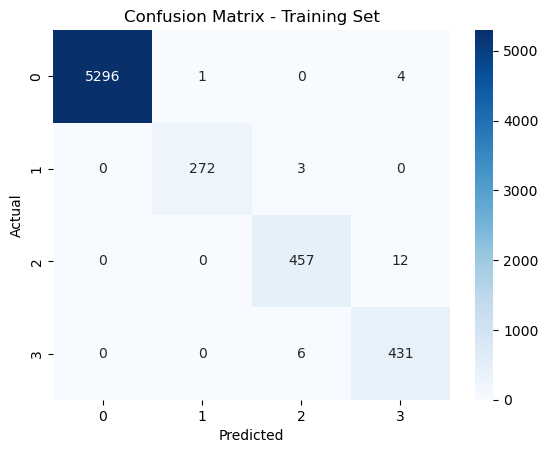

In [17]:
y_trn_pred = lgrg_model.predict(X_trn)

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(lgrg_model, X_trn, y_trn, cv=cv)
print(f"Cross Validation: {scores}")

print(f"Classification Report: {classification_report(y_trn, y_trn_pred)}")

con_mat = confusion_matrix(y_true=y_trn, y_pred=y_trn_pred)
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

Cross Validation: [0.98461538 0.99382716 0.98765432 0.98765432 0.99382716]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1308
           1       0.99      1.00      0.99        81
           2       0.96      0.97      0.96       115
           3       0.97      0.95      0.96       117

    accuracy                           0.99      1621
   macro avg       0.98      0.98      0.98      1621
weighted avg       0.99      0.99      0.99      1621



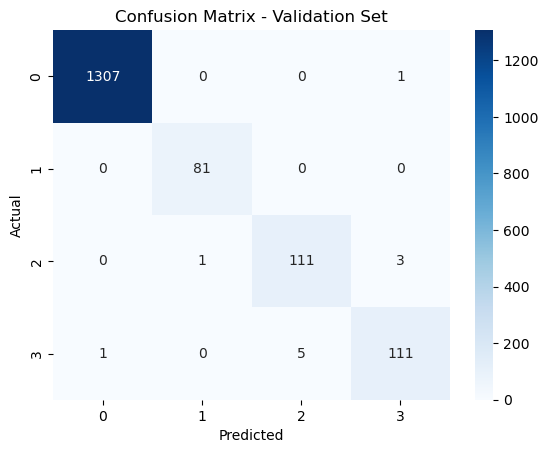

In [18]:
y_vld_pred = lgrg_model.predict(X_vld)

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(lgrg_model, X_vld, y_vld, cv=cv)
print(f"Cross Validation: {scores}")

print(f"Classification Report: {classification_report(y_vld, y_vld_pred)}")

con_mat = confusion_matrix(y_true=y_vld, y_pred=y_vld_pred)
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')
plt.show()

Cross Validation: [0.99014778 0.98518519 0.99012346 0.99259259 0.99012346]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.97      0.97      0.97       164
           3       0.94      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



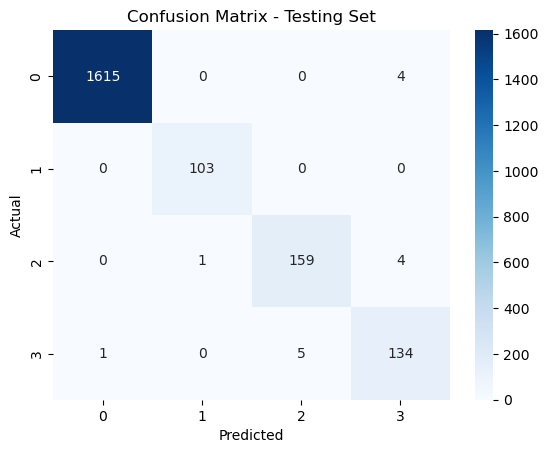

In [19]:
y_tst_pred = lgrg_model.predict(X_tst)

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(lgrg_model, X_tst, y_tst, cv=cv)
print(f"Cross Validation: {scores}")

print(f"Classification Report: {classification_report(y_tst, y_tst_pred)}")

con_mat = confusion_matrix(y_true=y_tst, y_pred=y_tst_pred)
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()